# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [303]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [304]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [305]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [306]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [307]:
df_data.shape

(4324, 9)

In [308]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [309]:
df_data[df_data.isna().any(axis=1)]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [310]:
df_data.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [311]:
df_data[df_data.duplicated()]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status


In [312]:
df_data.duplicated().sum()

np.int64(0)

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [313]:
clean_df = df_data.drop(columns=["Price"])

In [355]:
clean_df.sample(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status
11,11,11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,Failure
4107,4107,4107,US Air Force,"SLC-2E (75-1-1), Vandenberg AFB, California, USA","Tue Dec 04, 1962 21:30 UTC",Thor DM-21 Agena-D | FTV 1155,StatusRetired,Success
3055,3055,3055,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia","Sat Mar 23, 1974 14:14 UTC",Cosmos-3M (11K65M) | Cosmos 641 to 648,StatusRetired,Success
2619,2619,2619,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Tue Feb 14, 1978 09:30 UTC",Soyuz U | Cosmos 989,StatusRetired,Success
2807,2807,2807,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia","Tue Jun 29, 1976 08:12 UTC",Cosmos-3M (11K65M) | Cosmos 836,StatusRetired,Success


In [315]:
clean_df[clean_df.isna().any(axis=1)]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status


## Descriptive Statistics

In [316]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Mission_Status  4324 non-null   object
dtypes: int64(2), object(6)
memory usage: 270.4+ KB


In [317]:
clean_df.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [318]:
# Count launches per organisation, sort descending
launches_df = df_data["Organisation"].value_counts()
launches_df.head()

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
Name: count, dtype: int64

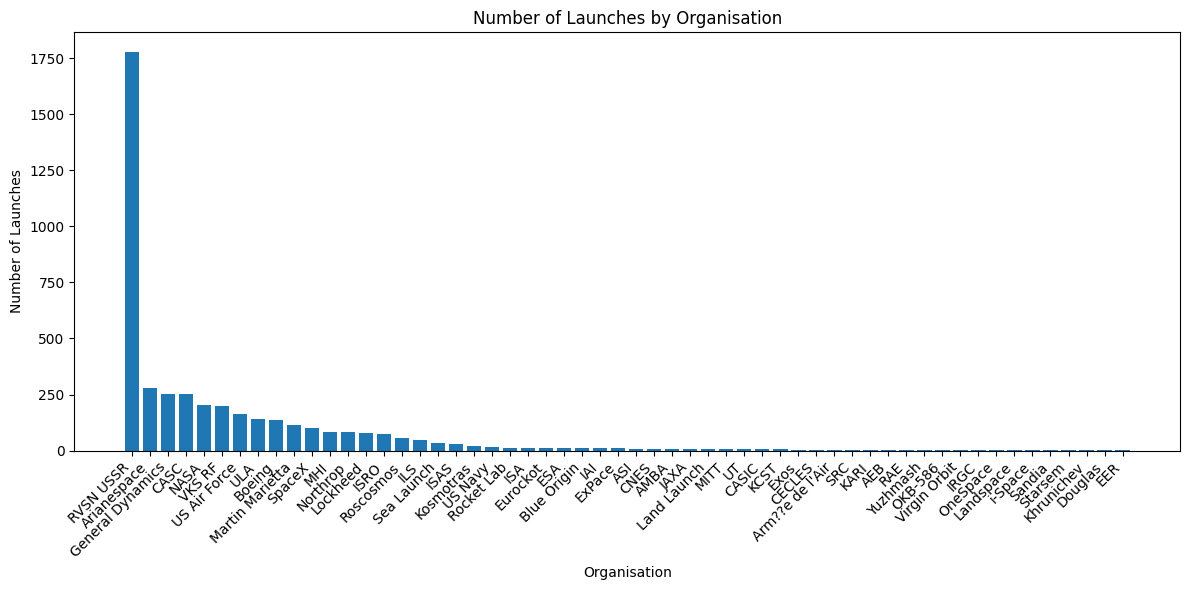

In [375]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(
    launches_df.index,
    launches_df.values
)

ax.set_title("Number of Launches by Organisation")
ax.set_xlabel("Organisation")
ax.set_ylabel("Number of Launches")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [320]:
rockets_df = df_data["Rocket_Status"].value_counts()
print(rockets_df)

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64


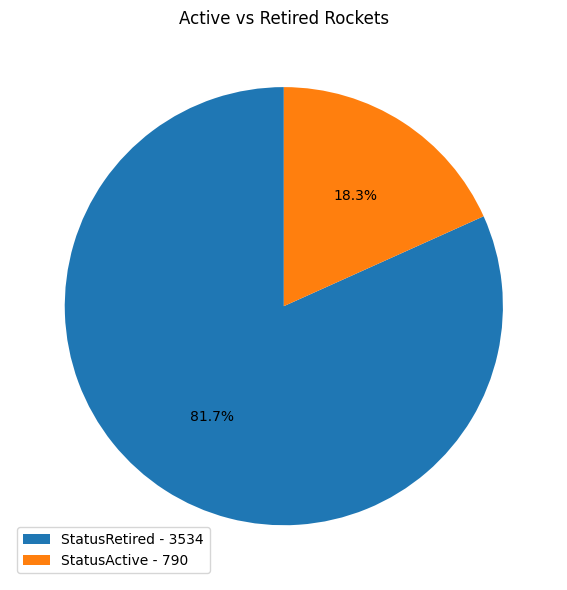

In [374]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(
    rockets_df,
    autopct="%1.1f%%",
    startangle=90,
    labels=None
)

ax.set_title("Active vs Retired Rockets")
ax.set_ylabel("")

legend_labels = [f"{label} - {count}" for label, count in rockets_df.items()]
ax.legend(legend_labels, loc="lower left")

plt.tight_layout()
plt.show()


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [322]:
missions_df = df_data["Mission_Status"].value_counts()
missions_df

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

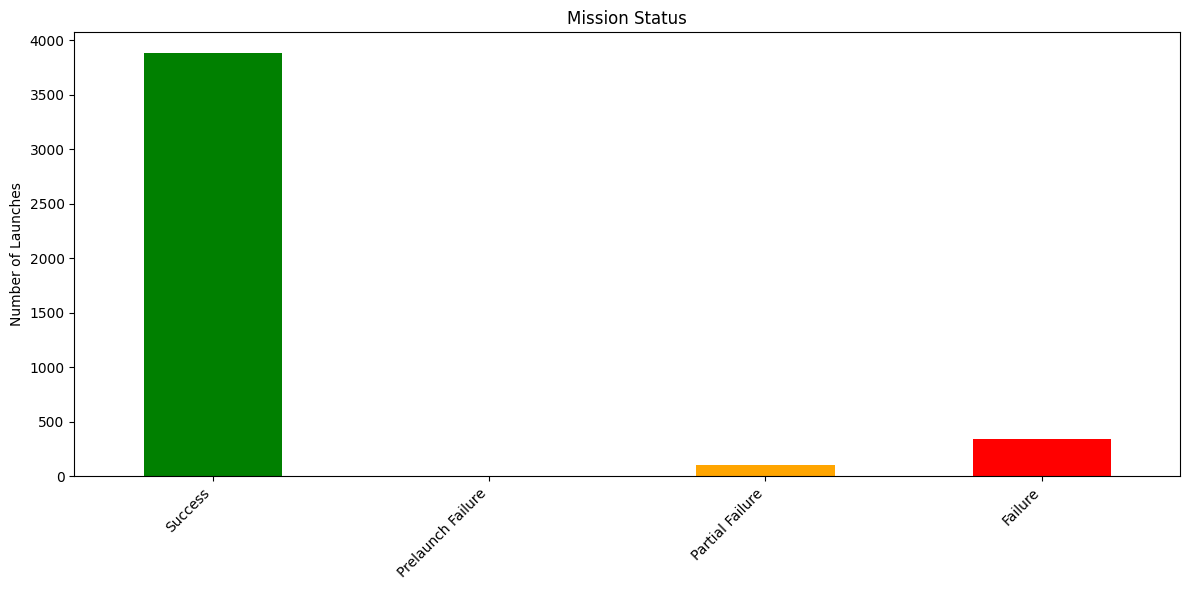

In [323]:
# Decided to change the order
order = ["Success", "Prelaunch Failure", "Partial Failure", "Failure"]
missions_df = missions_df.reindex(order)
# Decided to also change the colors
colors = ["green", "violet", "orange", "red"]

fig, ax = plt.subplots(figsize=(12, 6))
missions_df.plot(kind="bar", ax=ax, color=colors)

ax.set_title("Mission Status")
ax.set_xlabel("")
ax.set_ylabel("Number of Launches")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [324]:
price_df = df_data[df_data["Price"].notna()].copy()
price_df["Price"] = price_df["Price"].str.replace(",", "").astype(float) # had to convert the data from "object" to "float"
price_df

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


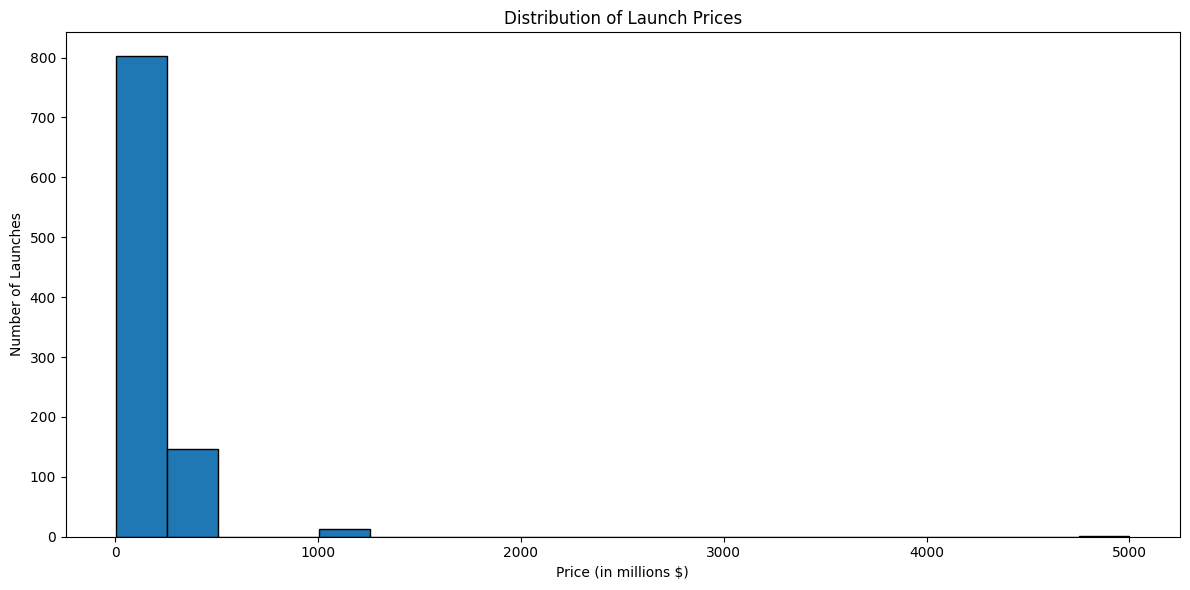

In [325]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(price_df["Price"], bins=20, edgecolor="black")

ax.set_title("Distribution of Launch Prices")
ax.set_xlabel("Price (in millions $)")
ax.set_ylabel("Number of Launches")
plt.tight_layout()
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [326]:
# Step 1: Extract country from Location column (last element after comma)
df_data["Country"] = df_data["Location"].str.strip().str.split(",").str[-1].str.strip()
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [327]:
# Step 2: Replace country names

country_replacements = {
    "Russia":                        "Russian Federation",
    "New Mexico":                    "USA",
    "Yellow Sea":                    "China",
    "Shahrud Missile Test Site":     "Iran",
    "Pacific Missile Range Facility":"USA",
    "Barents Sea":                   "Russian Federation",
    "Gran Canaria":                  "USA",
}
df_data["Country"] = df_data["Country"].replace(country_replacements)
print(df_data.head())
print(df_data[df_data["Country"] == "Russia"])

   Unnamed: 0.1  Unnamed: 0 Organisation  \
0             0           0       SpaceX   
1             1           1         CASC   
2             2           2       SpaceX   
3             3           3    Roscosmos   
4             4           4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  

In [328]:
# Step 3: Convert country name to ISO Alpha-3 code
def get_alpha3(country_name):
    try:
        return countries.get(country_name).alpha3
    except:
        return None

df_data["ISO3"] = df_data["Country"].apply(get_alpha3)
df_data.sample(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO3
3626,3626,3626,NASA,"LC-34, Cape Canaveral AFS, Florida, USA","Fri Oct 11, 1968 15:02 UTC",Saturn IB | Apollo 7,StatusRetired,NaN,Success,USA,USA
3935,3935,3935,Martin Marietta,"SLC-40, Cape Canaveral AFS, Florida, USA","Fri Oct 15, 1965 17:23 UTC",Titan IIIC | LCS-2 & OV2-1,StatusRetired,NaN,Failure,USA,USA
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success,Israel,ISR
2415,2415,2415,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Sat Mar 14, 1981 16:55 UTC",Tsyklon-2 | Cosmos 1258,StatusRetired,NaN,Success,Kazakhstan,KAZ
1135,1135,1135,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri Jul 20, 2001 00:17 UTC",Molniya-M /Block ML | Molniya-3K n†­170,StatusRetired,NaN,Success,Russian Federation,RUS


In [329]:
# Step 4: Count launches per country
launch_counts_df = df_data.groupby("ISO3").size().reset_index(name="Launches")
launch_counts_df.sample(5)


,ISO3,Launches
6,JPN,126
4,IND,76
1,BRA,3
8,KEN,9
0,AUS,6


In [330]:
# Step 5: Plot choropleth
fig = px.choropleth(
    launch_counts_df,
    locations="ISO3",
    color="Launches",
    color_continuous_scale="matter",
    title="Number of Rocket Launches by Country"
)

fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [331]:
failures_counts_df = df_data[df_data["Mission_Status"] == "Failure"].groupby("ISO3").size().reset_index(name="Failures")
failures_counts_df.sample(5)

,ISO3,Failures
0,AUS,3
10,USA,129
5,ISR,2
7,KAZ,72
6,JPN,10


In [332]:
fig = px.choropleth(
    failures_counts_df,
    locations="ISO3",
    color="Failures",
    color_continuous_scale=["#ffcccc", "#cc0000"],
    title="Number of Failures by Country"
)

fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [333]:
# Because the chart is too unreadable, I decided to reduce the number of countries
df_data["Country"].value_counts().reset_index()

,Country,count
0,Russian Federation,1398
1,USA,1351
2,Kazakhstan,701
3,France,303
4,China,269
5,Japan,126
6,India,76
7,Pacific Ocean,36
8,Iran,14
9,New Zealand,13


In [334]:
# Decided to keep until India, let's say 50 launches
top_countries_df = df_data[df_data["Country"].isin(df_data["Country"].value_counts()[df_data["Country"].value_counts() > 50].index)]

In [335]:
top_countries_df["Country"].value_counts().reset_index()

,Country,count
0,Russian Federation,1398
1,USA,1351
2,Kazakhstan,701
3,France,303
4,China,269
5,Japan,126
6,India,76


In [336]:
fig = px.sunburst(
    top_countries_df,
    path=["Country", "Organisation", "Mission_Status"],
    title="Launches by Country, Organisation and Mission Status",
    width=800,
    height=800
)

fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [337]:
money_spent_df = df_data[["Organisation", "Price","Country"]].dropna()
money_spent_df.rename(columns={"Price": "Costs"}, inplace=True)
money_spent_df["Costs"] = money_spent_df["Costs"].str.replace(",", "").astype(float)
money_spent_df = money_spent_df.groupby(["Country", "Organisation"])["Costs"].sum().reset_index()
money_spent_df

,Country,Organisation,Costs
0,China,CASC,"6,340.26"
1,China,ExPace,28.30
2,France,Arianespace,"16,248.00"
3,France,ESA,37.00
4,India,ISRO,"2,177.00"
5,Japan,JAXA,168.00
6,Japan,MHI,"3,532.50"
7,Kazakhstan,Arianespace,97.00
8,Kazakhstan,ILS,325.00
9,Kazakhstan,Kosmotras,348.00


In [338]:
fig = px.sunburst(
    money_spent_df,
    path=["Country", "Organisation", "Costs"],
    title="Launches by Country, Organisation and Mission Status",
    width=800,
    height=800
)

fig.show()


# Analyse the Amount of Money Spent by Organisation per Launch

In [339]:
org_launches_spent_df = df_data[["Organisation", "Price"]].dropna()
org_launches_spent_df.rename(columns={"Price": "Costs"}, inplace=True)
org_launches_spent_df["Costs"] = org_launches_spent_df["Costs"].str.replace(",", "").astype(float)

org_launches_spent_df

,Organisation,Costs
0,SpaceX,50.00
1,CASC,29.75
3,Roscosmos,65.00
4,ULA,145.00
5,CASC,64.68
...,...,...
3855,US Air Force,59.00
3971,US Air Force,63.23
3993,US Air Force,63.23
4000,US Air Force,63.23


In [340]:
org_launches_spent_df = org_launches_spent_df.groupby("Organisation").agg(
    Costs=("Costs", "sum"),
    Launches=("Organisation", "count")
).reset_index()

org_launches_spent_df

,Organisation,Costs,Launches
0,Arianespace,"16,345.00",96
1,Boeing,"1,241.00",7
2,CASC,"6,340.26",158
3,EER,20.00,1
4,ESA,37.00,1
5,Eurockot,543.40,13
6,ExPace,28.30,1
7,ILS,"1,320.00",13
8,ISRO,"2,177.00",67
9,JAXA,168.00,3


In [341]:
org_launches_spent_df["Costs per Launch"] = org_launches_spent_df["Costs"] / org_launches_spent_df["Launches"]
org_launches_spent_df

,Organisation,Costs,Launches,Costs per Launch
0,Arianespace,"16,345.00",96,170.26
1,Boeing,"1,241.00",7,177.29
2,CASC,"6,340.26",158,40.13
3,EER,20.00,1,20.00
4,ESA,37.00,1,37.00
5,Eurockot,543.40,13,41.80
6,ExPace,28.30,1,28.30
7,ILS,"1,320.00",13,101.54
8,ISRO,"2,177.00",67,32.49
9,JAXA,168.00,3,56.00


In [342]:
# I'm going to exclude RVSN USSR and NASA becuase they are too much of outliners...

org_launches_spent_df = org_launches_spent_df[~org_launches_spent_df["Organisation"].isin(["RVSN USSR", "NASA"])]

org_launches_spent_df

,Organisation,Costs,Launches,Costs per Launch
0,Arianespace,"16,345.00",96,170.26
1,Boeing,"1,241.00",7,177.29
2,CASC,"6,340.26",158,40.13
3,EER,20.00,1,20.00
4,ESA,37.00,1,37.00
5,Eurockot,543.40,13,41.80
6,ExPace,28.30,1,28.30
7,ILS,"1,320.00",13,101.54
8,ISRO,"2,177.00",67,32.49
9,JAXA,168.00,3,56.00


In [343]:
fig = px.bar(
    org_launches_spent_df.sort_values("Costs per Launch", ascending=True),
    x="Costs per Launch",
    y="Organisation",
    orientation="h",
    title="Cost per Launch by Organisation ($ millions)",
    color="Costs per Launch",
    color_continuous_scale=["#00cc00", "#cc0000"]  # green (cheap) → red (expensive)
)

fig.show()

# Chart the Number of Launches per Year

In [344]:
df_data["Year"] = df_data["Date"].str.extract(r"(\d{4})")

df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO3,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,2020
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,1957


In [345]:
launches_per_year = df_data["Year"].value_counts().sort_index().reset_index()
launches_per_year.columns = ["Year", "Launches"]

fig = px.line(
    launches_per_year,
    x="Year",
    y="Launches",
    title="Number of Launches per Year",
    markers=True
)

fig.update_layout(xaxis_tickangle=45)

fig.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [346]:
df_data["Month"] = df_data["Date"].str.extract(r"[A-Z][a-z]{2} ([A-Z][a-z]{2})")

df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO3,Year,Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020,Aug
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,Aug
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,Aug
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,2020,Jul
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,Feb
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958,Feb
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957,Dec
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,1957,Nov


In [347]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

launches_per_month = df_data["Month"].value_counts().reset_index()
launches_per_month["Month"] = pd.Categorical(launches_per_month["Month"], categories=month_order, ordered=True)
launches_per_month.columns = ["Month", "Launches"]
launches_per_month = launches_per_month.sort_values("Month")

fig = px.bar(
    launches_per_month,
    x="Month",
    y="Launches",
    title="Number of Launches per Month",
    color_discrete_sequence=["#003f5c"]
)

fig.update_layout(xaxis_tickangle=45)

fig.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [348]:
price_over_time_df = df_data[["Year","Price"]].dropna()
price_over_time_df.rename(columns={"Price":"Costs per Launch"}, inplace=True)
price_over_time_df["Costs per Launch"] = price_over_time_df["Costs per Launch"].str.replace(",", "").astype(float)
price_over_time_df = price_over_time_df.groupby("Year").mean("Costs per Launch").reset_index()


price_over_time_df

,Year,Costs per Launch
0,1964,63.23
1,1965,63.23
2,1966,59.00
3,1967,196.62
4,1968,279.20
5,1969,609.50
6,1970,"1,160.00"
7,1971,"1,160.00"
8,1972,"1,160.00"
9,1973,"1,160.00"


In [349]:
fig = px.line(
    price_over_time_df,
    x="Year",
    y="Costs per Launch",
    title="Costs per Launch over Years",
    markers=True
)

fig.update_layout(xaxis_tickangle=45)

fig.show()


# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [350]:
top_10_org = df_data["Organisation"].value_counts().nlargest(10).index

top_org_df = df_data[["Organisation","Year"]]

top_org_df["Year"] = top_org_df["Year"].astype(int)
top_org_df = top_org_df[top_org_df["Organisation"].isin(top_10_org)]
top_org_df = (top_org_df
              .groupby(["Year","Organisation"])
              .size()
              .reset_index(name="Launches")
              .sort_values(["Year","Organisation"]))


top_org_df


C:\Users\alexa\AppData\Local\Temp\ipykernel_13460\910812661.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Organisation,Launches
0,1957,RVSN USSR,2
1,1958,NASA,2
2,1958,RVSN USSR,5
3,1958,US Air Force,2
4,1959,General Dynamics,1
...,...,...,...
318,2019,VKS RF,8
319,2020,Arianespace,4
320,2020,CASC,19
321,2020,ULA,4


In [351]:
fig = px.line(
    top_org_df,
    x="Year",
    y="Launches",
    color="Organisation",
    title="Rocket Launches Over Time by Top 10 Organisations",
    markers=True
)

fig.update_layout(
    legend=dict(orientation='h', yanchor='bottom', y=1, xanchor='center', x=0.5)
)
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Launches")
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [363]:
df_data["Year"] = df_data["Year"].astype(int)
cold_war_df = df_data[
    (df_data["Year"] <= 1991) & 
    (df_data["Country"].isin(["Russian Federation","USA","Kazakhstan"]))
    ]

cold_war_df["Country"] = cold_war_df["Country"].replace({
    "Russian Federation": "USSR",
    "Kazakhstan": "USSR"
})

cold_war_df

C:\Users\alexa\AppData\Local\Temp\ipykernel_13460\1237839490.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO3,Year,Month
1718,1718,1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan","Fri Dec 20, 1991",Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,USSR,KAZ,1991,Dec
1719,1719,1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed Dec 18, 1991 03:54 UTC",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,USSR,RUS,1991,Dec
1721,1721,1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 07, 1991 22:47 UTC",Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,USA,1991,Dec
1722,1722,1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Thu Nov 28, 1991 13:23 UTC",Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,USA,1991,Nov
1723,1723,1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Wed Nov 27, 1991 03:30 UTC",Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,USSR,RUS,1991,Nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,Feb
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958,Feb
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957,Dec
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,USSR,KAZ,1957,Nov


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [365]:
cold_war_df["Country"].value_counts()

Country
USSR    1770
USA      662
Name: count, dtype: int64

In [366]:
cold_war_launches_df = cold_war_df.groupby("Country").size().reset_index(name="Launches")

In [ ]:
fig = px.bar(
    cold_war_launches_df,
    x="Country",
    y="Launches",
    title="USSR vs USA Total Rocket Launches",
    text="Launches",
    color="Country",
    color_discrete_map={
        "USA": "blue",
        "USSR": "red"}
)

fig.update_traces(
    textposition="outside",
    cliponaxis=False
)

fig.update_xaxes(title_text="Country")
fig.update_yaxes(title_text="Launches")

fig.show()



## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.